In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
dirs = {}

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
 

out_dir = '/nfshome/jmao/cms-llp/plots/20190926/'

fnames = {}

fname = {
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root',
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root',

        }

texs = {}

texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root'] = 'ctau = 1000 mm, W(lv)H(bb)'
texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 'cms, W(lv)H(bb)'


cols = {}

 
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root'] = 215
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 207


styles = {}

styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root'] = 3
styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root'] = 4

tree = OrderedDict()

for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    tree[file] = root_dir['ntuples/llp']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)
    v = tree[file]
    llp_d_pid = v['gLLP_daughter_pid'].array()
    print(llp_d_pid[:10])

/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root
Open ready
ctau = 1000 mm, W(lv)H(bb)
Tree ready
<TTree b'llp' at 0x7fe49f15d240> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root', <TTree b'llp' at 0x7fe49f15d240>)])
[[1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]]
/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root
Open ready
cms, W(lv)H(bb)
Tree ready
<TTree b'llp' at 0x7fe49cbf9dd8> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix

# LHE Comments  --- Higgs Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f64e3396ba8>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f64e31168d0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_h_pt.png has been created


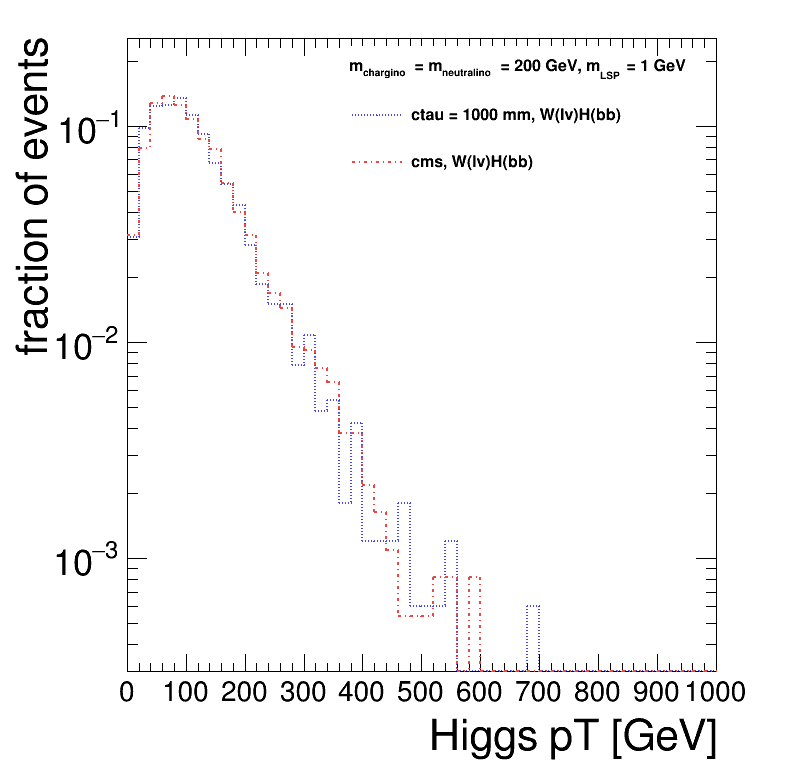

In [7]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    

    
    
    if 'cms' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
        
#         print(tags[:10])
#         print(np.unique(tags))
    
        # variables
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

#         print(h_pt_all[:10])
#         print(pt[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1


    elif 'aod' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
    
#         print(tags[:10])
#         print(pt[:10])
    
        # variables
        
        h_pt = pt[basic_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

#         print(h_pt_all[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.04)

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_h_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
['TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000']
[115.10711   33.400723 118.289474  97.10425  218.69974   15.793674
  44.648666  38.560596  29.485249  34.56129 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
['TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550']
[ 80.653046 101.85721  150.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


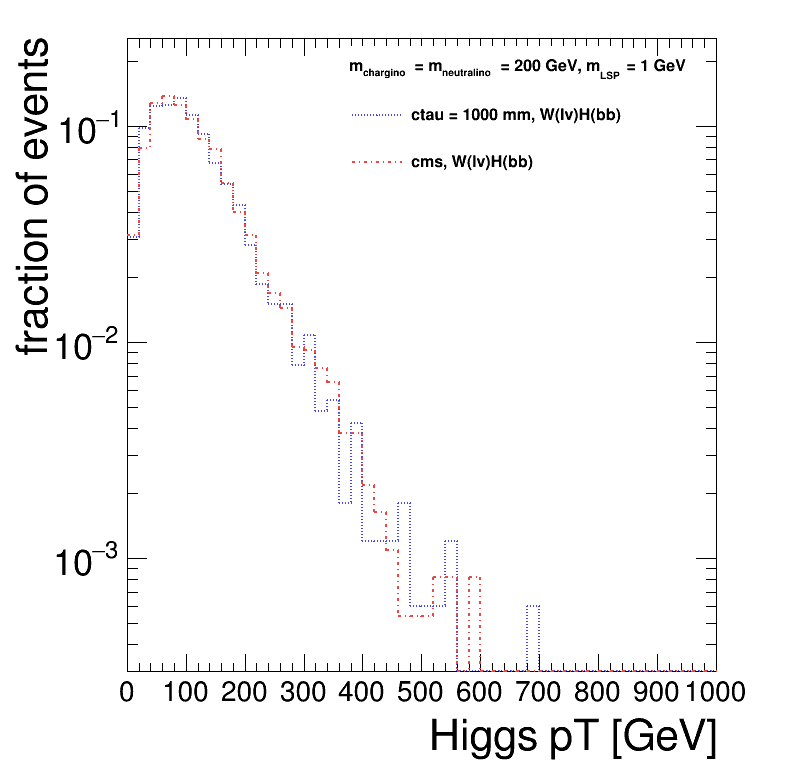

In [52]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'lhe_h_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
['TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000']
0 [115.10711] [0.72408473] [1.5510887] [193.06462]
[115.10711   33.400723 118.289474  97.10425  218.69974   15.793674
  44.648666  38.560596  29.485249  34.56129 ]
[ 0.72408473  0.96765053 -0.4502946  -1.6233839   2.2795305  -3.8387597
  1.2283554   3.311782    1.9427116  -2.311427  ]
[ 1.5510887 -2.918475   2.6840801  2.6814363 -1.5688926 -1.7613056
  2.4858112 -1.0559237  0.9837882 -2.1896312]
[ 193.06462  133.61885  180.54037  283.72906 1087.128    387.18564
  144.05241  543.8178   163.19487  207.89851]
1666
0 115.10711 0.72408473 1.5510887 193.0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_h_mass.png has been created


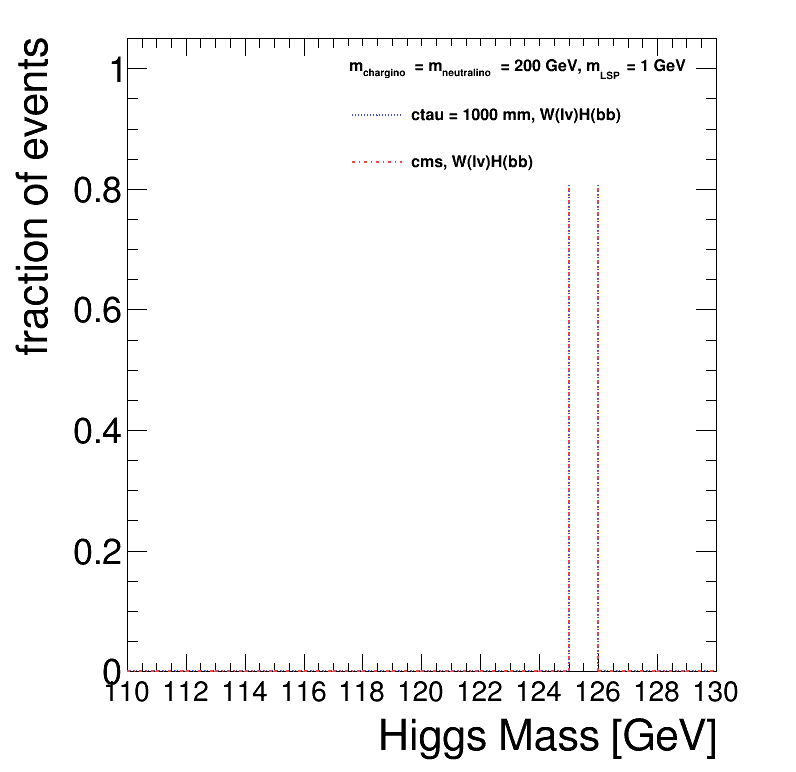

In [53]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]
        h_eta = eta[cut_str]
        h_phi = phi[cut_str]
        h_e = e[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        h_eta = eta[basic_str]
        h_phi = phi[basic_str]
        h_e = e[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()
    h_eta_all = h_eta.flatten()
    h_phi_all = h_phi.flatten()
    h_e_all = h_e.flatten()
    print(0,h_pt[0],h_eta[0],h_phi[0],h_e[0])
    print(h_pt_all[:10])
    print(h_eta_all[:10])
    print(h_phi_all[:10])
    print(h_e_all[:10])
    print(len(h_pt_all))

    h_mass_all = []
    
    for index in range(0,len(h_pt_all)):
#         print(i)
        
        tmp_p4_h    = rt.TLorentzVector()
        tmp_p4_h.SetPtEtaPhiE(h_pt_all[index], h_eta_all[index], h_phi_all[index], h_e_all[index])
        print(index,h_pt_all[index],h_eta_all[index],h_phi_all[index],h_e_all[index])

        tmp_mass = tmp_p4_h.M()
        
        h_mass_all.append(tmp_mass)
        
        if i>10:
            break
    
#     h_mass_all = h_mass.flatten()

#     print(h_pt_all[:10])

    ht[k] = create_TH1D( h_mass_all, axis_title=['Higgs Mass [GeV]', 'fraction of events'], name="", binning=[20,110,130])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_h_mass.png')

# LHE Comments --- MET

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/met.png has been created


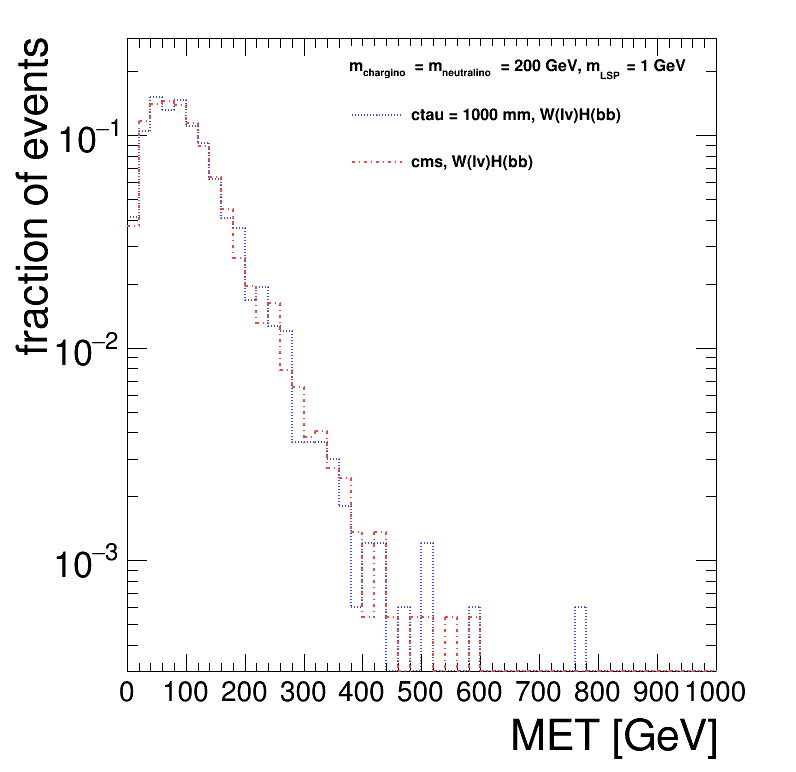

In [54]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches
    
    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()
    met = v['genMetPtCalo'].array()
    

    tags = []
    
    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)
        
    tags = np.array(tags)
    
    # variables
    
    if 'cms' in k:
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
    
        met = met[lhe_str]

        
    #plotting


    ht[k] = create_TH1D( met, axis_title=['MET [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'met.png')

# LHE Comments --- N2  N1 Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7fe49f15d240>
['TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000']
[ 77.830925  42.340168 145.42052  155.61415  365.18127   47.15713
 111.06261  149.8       16.781588 181.05893 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7fe49cbf9dd8>
['TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550']
[ 72.399864  82.38488  177.6

Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_n2_pt.png has been created


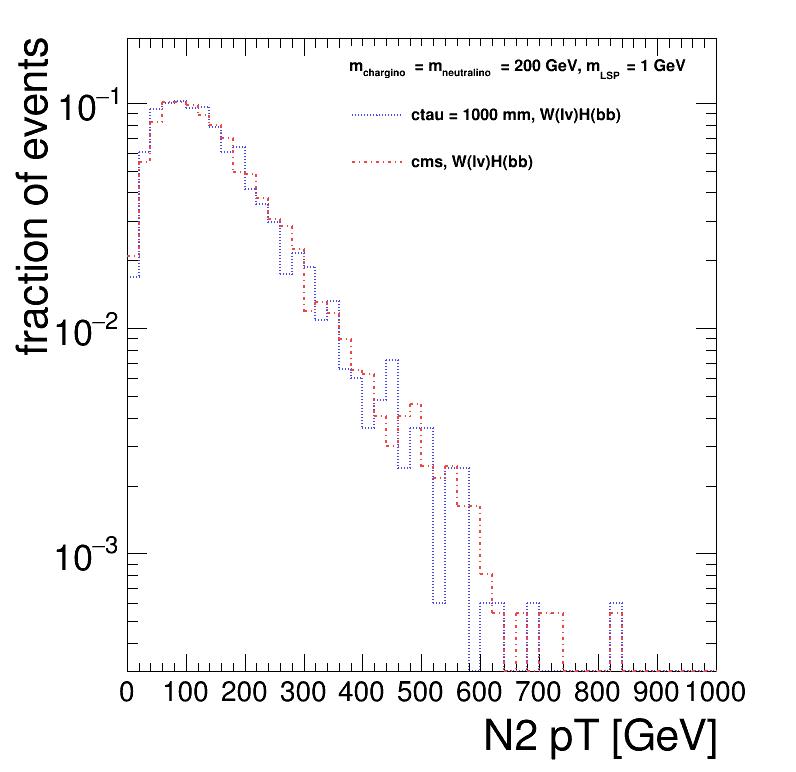

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000023, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['N2 pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1
    
leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7fe49f15d240>
['TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000']
[ 40.961273  63.810837  63.574097  59.690346 149.9471    72.54034
  74.77832  115.472984  34.588326 155.55838 ]
[  1.4945772   2.7053375   3.4276395 ... 309.63354   332.32108
 554.74164  ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7fe49cbf9dd8>
['TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToL

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_n1_from_n2_pt.png has been created


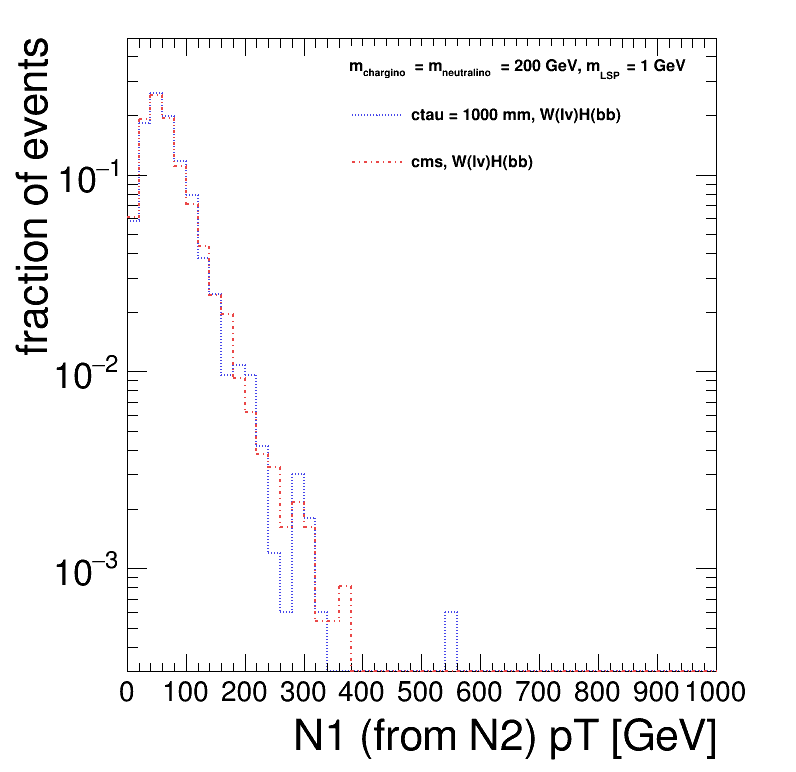

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000023)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N2) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7fe49f15d240>
['TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000'
 'TChiWH_WToLNu_HToBB_200_1_1000' 'TChiWH_WToLNu_HToBB_200_1_1000']
1666
1666
[[77.830925] [42.340168] [145.42052] ... [149.8] [16.781588] [181.05893]]
[[2.6770818] [] [0.86952454] ... [2.3914077] [-3.8485959] [-1.293314]]
[-6.8041958337067436e-06, -9.733530837386463e-06, -1.4221756895741563e-05, -1.3118234527361788e-06, -9.709401839181255e-06, -4.7616192238372745e-06, -5.33428094001561e-07, -1.6547184558981924e-05, -7.2137862289539165e-06, -7.668755887090865e-06]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7fe49cbf9dd8>


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:68: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


['TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550'
 'TChiWH_WToLNu_HToBB_700_550' 'TChiWH_WToLNu_HToBB_700_550']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


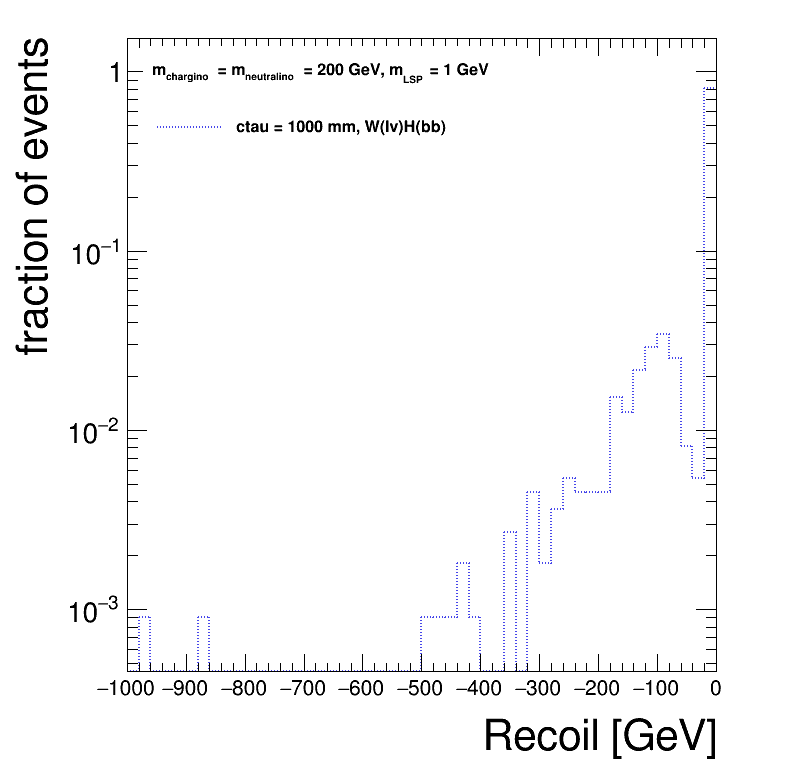

In [47]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.80,0.65,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    n1_str = np.logical_and(pid==1000024, status==22)
    n2_str = np.logical_and(pid==1000023, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'aod' in k:
        
        n2_pt = pt[n2_str]
        n2_eta = eta[n2_str]
        n2_phi = phi[n2_str]
        n2_e = e[n2_str]
        
        n1_pt = pt[n1_str]
        n1_eta = eta[n1_str]
        n1_phi = phi[n1_str]
        n1_e = e[n1_str]
        
        recoil = []
        print(len(n2_pt))
        print(len(n1_pt))
        print(n2_pt[:10])
        print(n1_eta[:10])

        for index in range(len(n2_pt)):

            tmp_p4_n2    = rt.TLorentzVector()
            tmp_p4_n1    = rt.TLorentzVector()
            
            if n1_eta[index]:
                tmp_p4_n2.SetPtEtaPhiE(n2_pt[index], n2_eta[index], n2_phi[index], n2_e[index])
                tmp_p4_n1.SetPtEtaPhiE(n1_pt[index], n1_eta[index], n1_phi[index], n1_e[index])
    #             tmp_p4_n1.SetPtEtaPhiE(n1_pt[index], n1_eta[index], n1_phi[index], n1_e[index])

                tmp_p4 = tmp_p4_n2 + tmp_p4_n1
                tmp_recoil = -tmp_p4.Pt() 

                recoil.append(tmp_recoil)


        #plotting

        print(recoil[:10])
        recoil_all = recoil 

        ht[k] = create_TH1D( recoil_all, axis_title=['Recoil [GeV]', 'fraction of events'], name="", binning=[50,-1000,0])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.03)
        ht[k].GetYaxis().SetLabelSize(0.04)

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'lhe_n1_from_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
[]
[]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
[]
[]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Error in <TH1D::DrawNormalized>: Sum of weights is null. Cannot normalize histogram: 
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_n1_from_n3_pt.png has been created


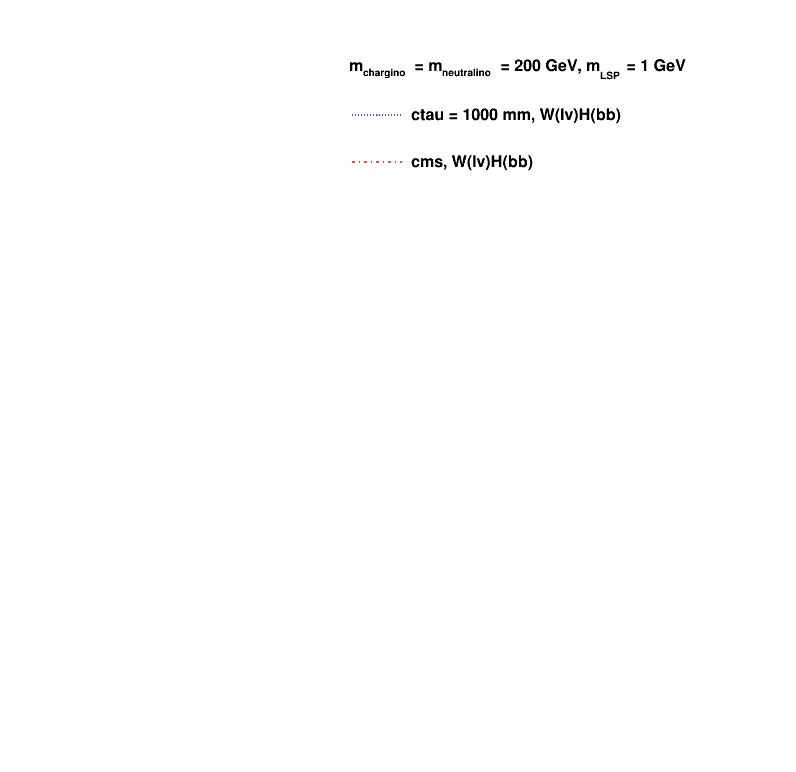

In [57]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000025)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N3) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n3_pt.png')

# b quark Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
[ 18.118832 106.99752   44.05207   74.41802   26.27456  144.55734
 123.49913   32.505245  44.45876  186.29639 ]
[  1.8637805   3.3371766   4.0279245 ... 440.59503   446.63843
 489.36194  ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
[ 78.4459    67.75532   31.384832 116.55392  166.1409    16.284647
  18.447964  83.00872  106.45378   22.439157]
[  1.0504284   1.6271601   2.2451887 ... 530.2051    565.1198
 599.98804  ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_b_pt.png has been created


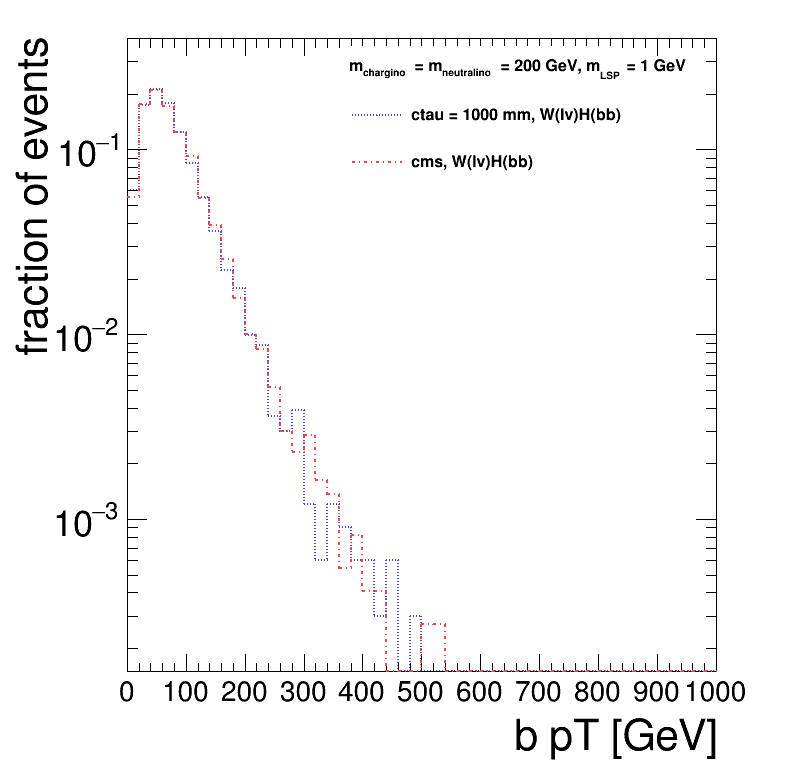

In [58]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(abs(pid)==5, status==23)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['b pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_b_pt.png')

# lepton Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
[1.1287033e-01 4.1390873e-02 1.1490605e+01 1.7642722e+00 2.5234938e-02
 1.5651149e-01 4.7762394e+01 7.3360491e-01 2.3810806e-02 5.4666424e-01]
[5.9489517e-05 1.7999229e-04 2.0713110e-04 ... 4.5042065e+02 5.0472375e+02
 5.0474719e+02]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
[1.8979422e+01 3.0674151e-01 9.4748886e+01 6.2694883e-01 4.2739335e-01
 4.5662586e-02 4.4091381e+01 5.1165096e+01 1.6673195e+01 1.5963502e-03]
[1.6592999e-04 2.2728583e-04 2.6479206e-04 ... 4.3720389e+02 4.3760043e+02
 4.8641693e+02]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/lhe_lepton_pt.png has been created


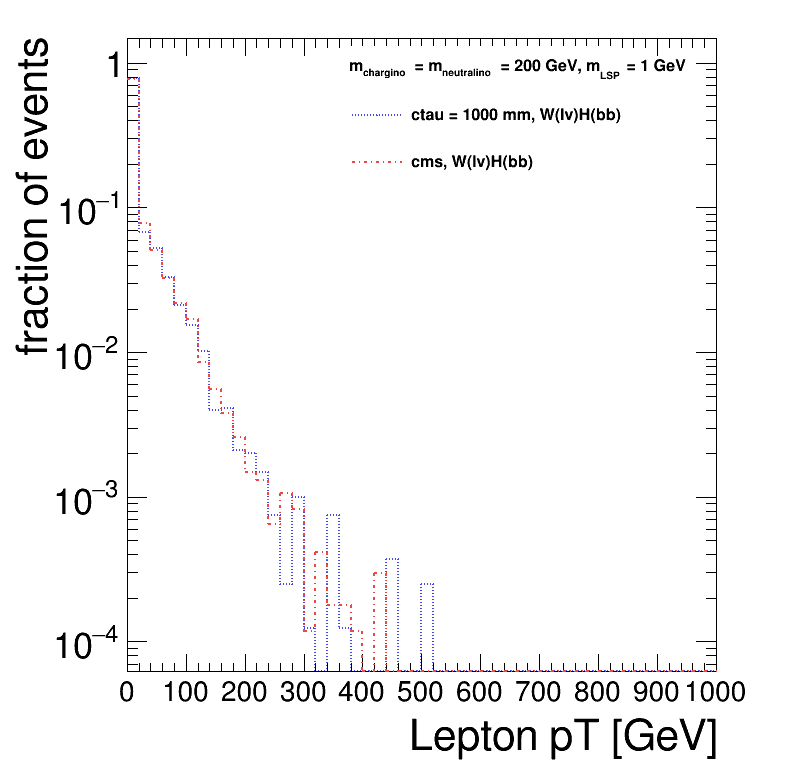

In [59]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    pid_str = np.logical_or(abs(pid)==11, abs(pid)==13)
    basic_str = np.logical_and(pid_str, 1)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['Lepton pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_lepton_pt.png')

# ctau

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
 FCN=63.3646 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=1.30384e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.13200e+00   3.69051e-02   9.77903e-05   1.27782e-02
   2  Slope       -1.05008e-02   2.92910e-04   7.75496e-07  -1.75696e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/decay_ctau_beta.png has been created


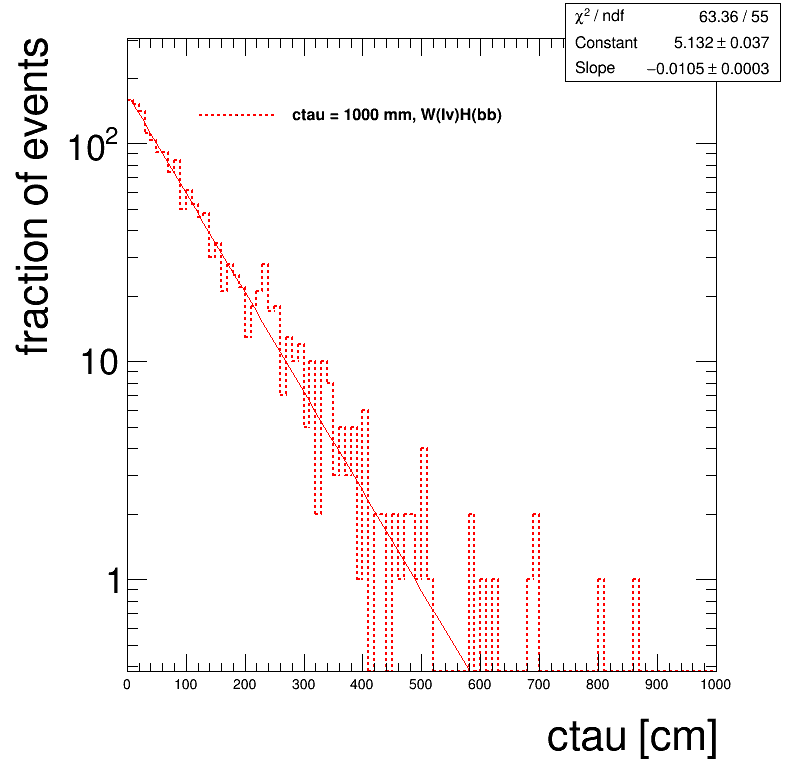

In [60]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'aod' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,1000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_beta.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f3f5680bfd0>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f3f7637ebe0>
 FCN=995.397 FROM MIGRAD    STATUS=CONVERGED     151 CALLS         152 TOTAL
                     EDM=3.80247e-13    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.34300e+01   6.65507e-03   1.99436e-06  -8.18072e-05
   2  Slope       -2.96608e-01   1.11537e-03  -7.71301e-07   5.63709e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/decay_ctau_prompt.png has been created


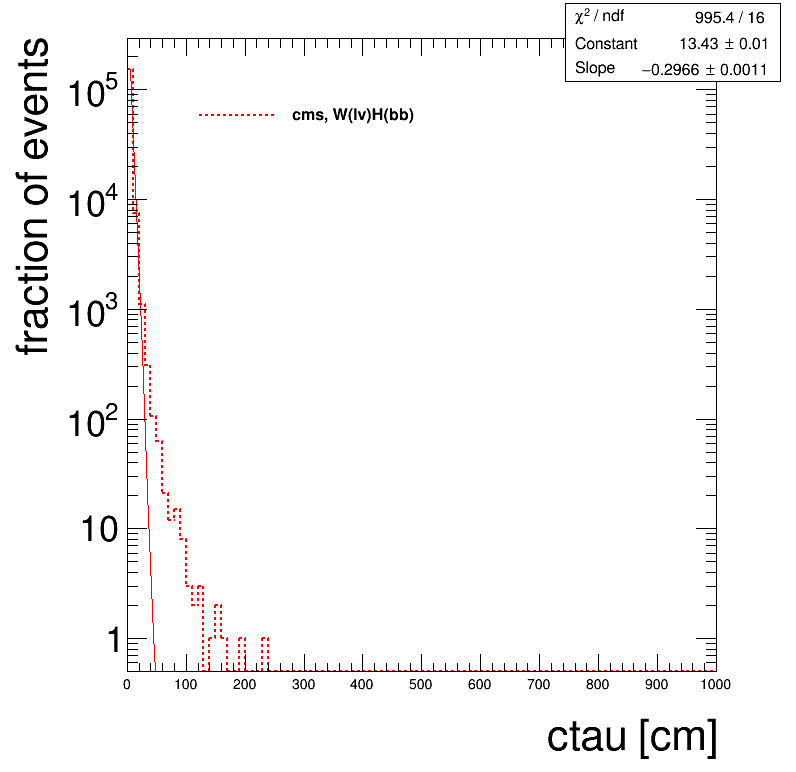

In [64]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'cms' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,1000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_prompt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f64e3396ba8>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f64e31168d0>
 FCN=116.32 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=2.90418e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.58336e+00   2.81965e-02   8.84940e-05  -4.14348e-02
   2  Slope       -5.43958e-01   1.20431e-02   3.78440e-05  -5.18407e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/decay_ctau_prompt_200.png has been created


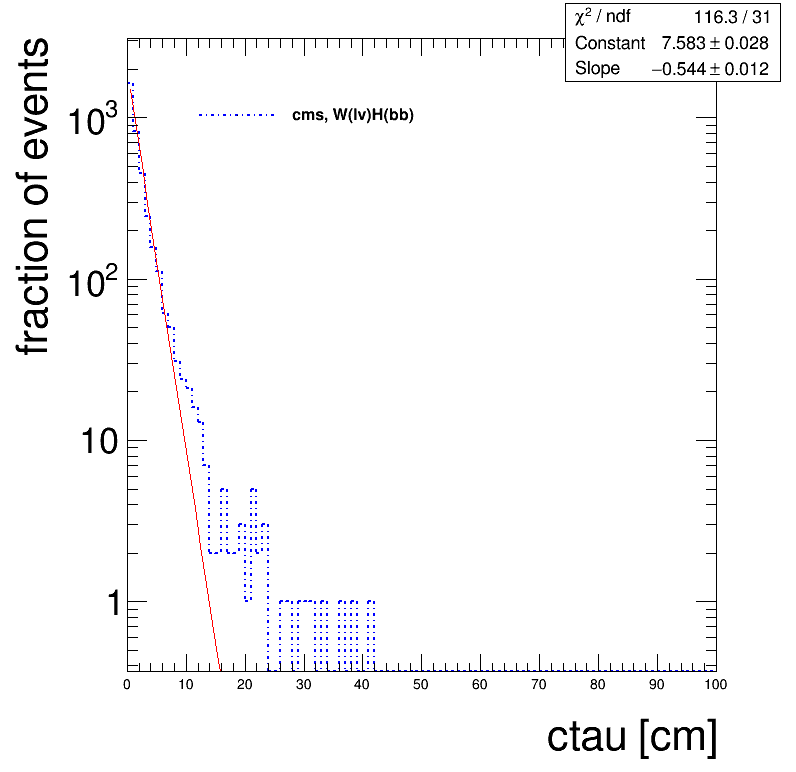

In [57]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'cms' in k:
    
        lhe = v['lheComments'].array()


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)

    #     print(tags[:10])

        # variables
        
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
     
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

        # 200_1
        beta = beta[lhe_str]
        
        decay_x =decay_x[lhe_str]
        decay_y =decay_y[lhe_str]
        decay_z =decay_z[lhe_str]
 
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,100])
        hct[k].SetLineStyle(4)
        hct[k].SetLineColor(4)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

        leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'decay_ctau_prompt_200.png')

# GEN time

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7f64e3396ba8>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7f64e31168d0>
[b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' ... b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1']
 FCN=0.0245191 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=8.01904e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.31079e+02   5.39431e+01   1.13967e-02  -1.32258e-06
   2  Mean        -5.24797e-03   6.13511e-03   3.02980e-06   1.51387e-02
   3  Sigma        1.69133e-01   1.07931e-02   4.06743e-06   1.11511e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/gen_time_cms.png has been created


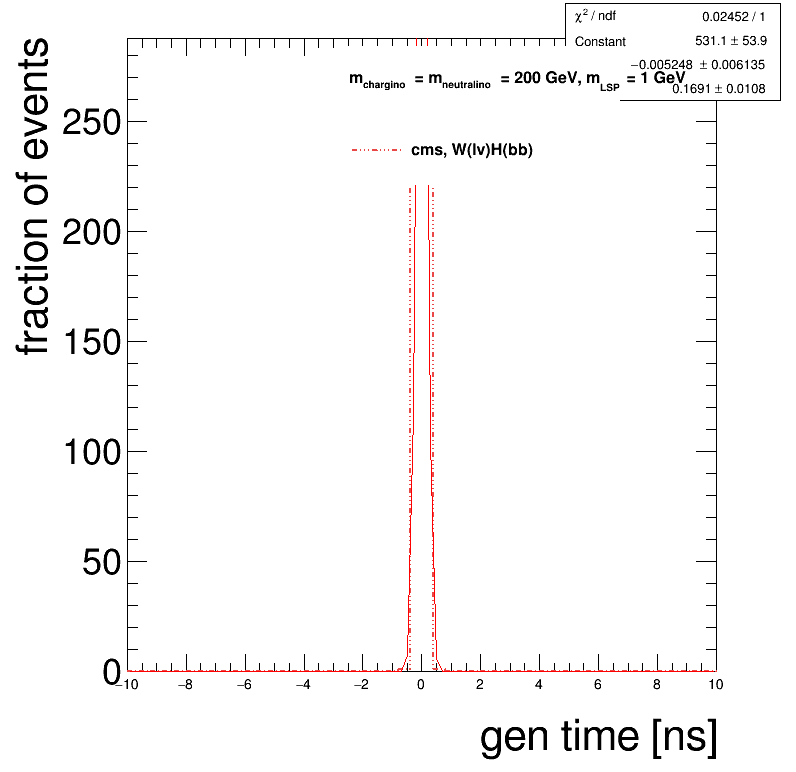

In [68]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    llp_pt = v['gLLP_pt'].array()
    llp_d_pt = v['gLLP_daughter_pt'].array()
    lhe = v['lheComments'].array()


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        llp_str = np.logical_and(llp_pt[:,0]>100 , llp_d_pt[:,0]>100)
        cut_str = np.logical_and(llp_str, lhe_str)
    
#         t_all = t[lhe_str]
        t_all = t[cut_str]
        lhe_all = lhe[lhe_str]
        
        print(lhe_all[:10])


#     elif 'aod' in k:
        

#         t_all = t
        
    
 

        t_all_flat = t_all[:,0]
#         t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,10])
#         ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
    #     ht[k].Draw('same')
        ht[k].Fit('gaus')
#         ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
#         ht[k].Scale(1./ht[k].GetEntries())
        ht[k].Draw('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time_cms.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7efd76b2fcf8>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7efd76b2f8d0>
[b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' ... b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1' b'TChiWH_WToLNu_HToBB_200_1']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/gen_time_higgs.png has been created


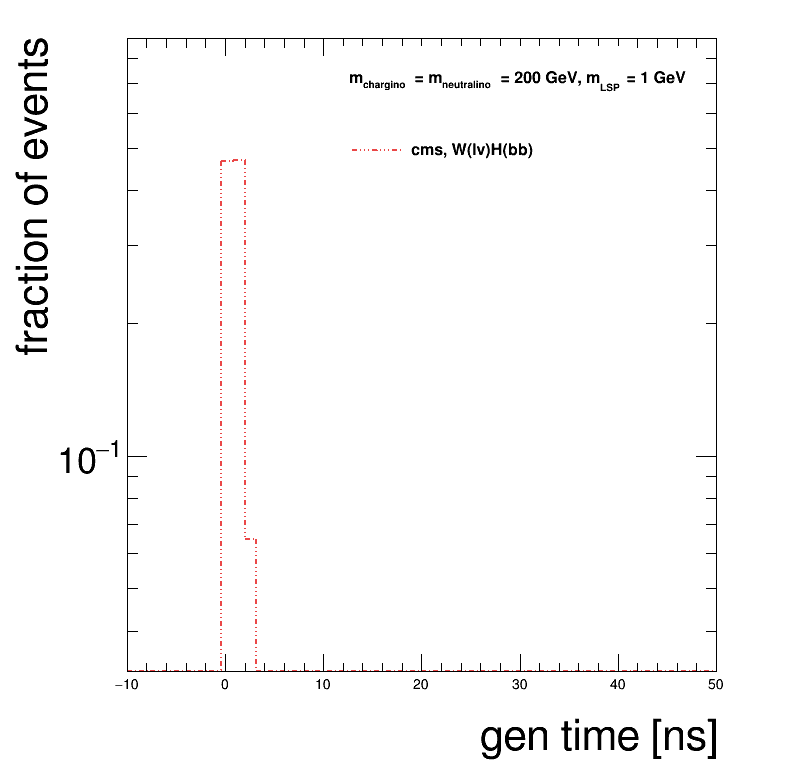

In [24]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    llp_pt = v['gLLP_pt'].array()
    llp_d_pt = v['gLLP_daughter_pt'].array()
    lhe = v['lheComments'].array()


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
        llp_d_pid = v['gLLP_daughter_pid'].array()
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
#         llp_str = np.logical_and(1 , llp_d_pid[:,1]==25)
        llp_str = np.logical_and(llp_d_pid[:,1]==25 , llp_d_pt[:,1]>100)
        cut_str = np.logical_and(llp_str, lhe_str)
    
#         t_all = t[lhe_str]
        t_all = t[cut_str]
        lhe_all = lhe[lhe_str]
        
        print(lhe_all[:10])


#     elif 'aod' in k:
        

#         t_all = t
        
    

        t_all_flat = t_all[:,1]
#         t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

#         ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,10])
        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
    #     ht[k].Draw('same')
#         ht[k].Fit('gaus')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
#         ht[k].Scale(1./ht[k].GetEntries())
#         ht[k].Draw('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time_higgs.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7efd868ae198>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7efd6ac18c88>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/gen_time_200.png has been created


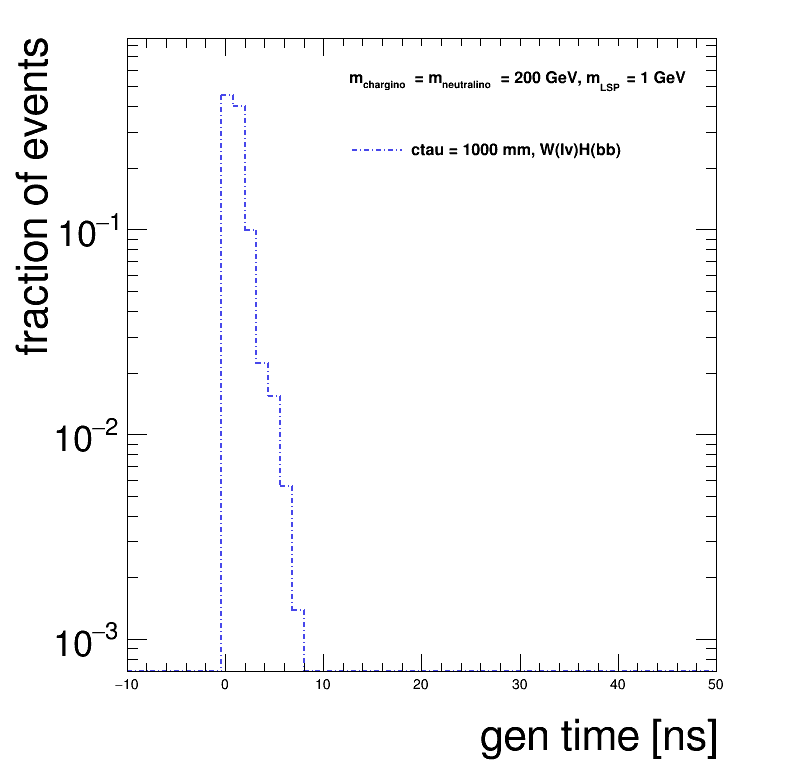

In [28]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

 
    if 'aod' in k:
        
        llp_d_pid = v['gLLP_daughter_pid'].array()
        llp_d_pt = v['gLLP_daughter_pt'].array()
    
        lhe_str = np.logical_and(1,  1)
#         llp_str = np.logical_and(1 , llp_d_pid[:,1]==25)
        llp_str = np.logical_and(llp_d_pid[:,1]==25 , llp_d_pt[:,1]>100)
        cut_str = np.logical_and(llp_str, lhe_str)
    
#         t_all = t[lhe_str]
        t_all = t[cut_str]

#         t_all = t
 

        t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)
#         print(ht[k].GetBinContent(10))
#         print(ht[k].Integral())
#         print(ht[k].GetEntries())
    
    #     ht[k].SetMaximum(1)
    #     ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
#         ht[k].Scale(1./ht[k].GetEntries())
#         print(ht[k].GetBinContent(10))
#         ht[k].Draw('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time_200.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_aod_lhe.root <TTree b'llp' at 0x7efd868ae198>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_WH_200_cms_lhe.root <TTree b'llp' at 0x7efd6ac18c88>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190926/gen_time.png has been created


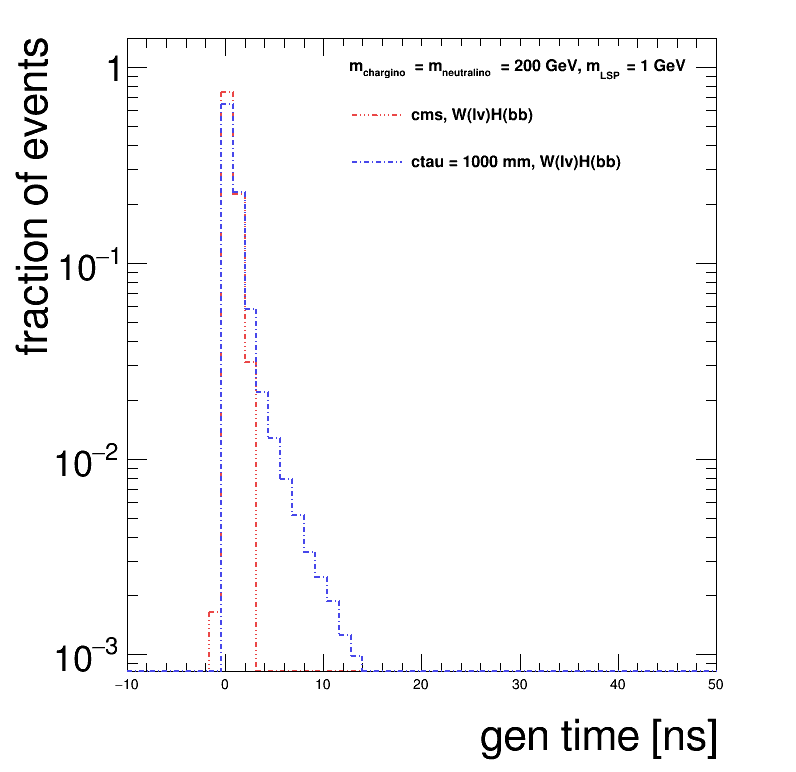

In [33]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

 

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    t = v['gen_time'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()
    llp_d_pid = v['gLLP_daughter_pid'].array()
    llp_d_pt = v['gLLP_daughter_pt'].array()

    llp_str = np.logical_and(llp_d_pid[:,1]==25 , llp_d_pt[:,1]>100)

    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiWH_WToLNu_HToBB_200_1')
        cut_str = np.logical_and(llp_str, lhe_str)
    
#         t_all = t[lhe_str]
        t_all = t[cut_str]    
      

        t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
#         ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
#         ht[k].Scale(1./ht[k].GetEntries())
#         ht[k].Draw('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1
        
for k,v in tree.items(): 
    if 'aod' in k:
        

    
        lhe_str = np.logical_and(1,  1)
        cut_str = np.logical_and(llp_str, lhe_str)
    
#         t_all = t[lhe_str]
        t_all = t[cut_str]

#         t_all = t
 

        t_all_flat = t_all.flatten()

    #         print(t_all[0:100])

        ht[k] = create_TH1D( t_all_flat, axis_title=['gen time [ns]', 'fraction of events'], name="", binning=[50,-10,50])
        ht[k].SetLineStyle(styles[k]+2)
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])
        ht[k].GetXaxis().SetLabelSize(0.02)
        ht[k].GetYaxis().SetLabelSize(0.05)
    #     ht[k].Scale(1./ht[k].GetEntries())
    #     ht[k].GetYaxis().SetRangeUser(0,1)

    #     ht[k].SetMaximum(1)
#         ht[k].Draw('same')
        ht[k].DrawNormalized('same')
        ht[k].SetMinimum(0)
#         ht[k].Scale(1./ht[k].GetEntries())
#         ht[k].Draw('same')
        
        leg.AddEntry(ht[k], texs[k])

        i += 1
    

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'gen_time.png')